Primeras filas del dataset:
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1

Descripción básica:
              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


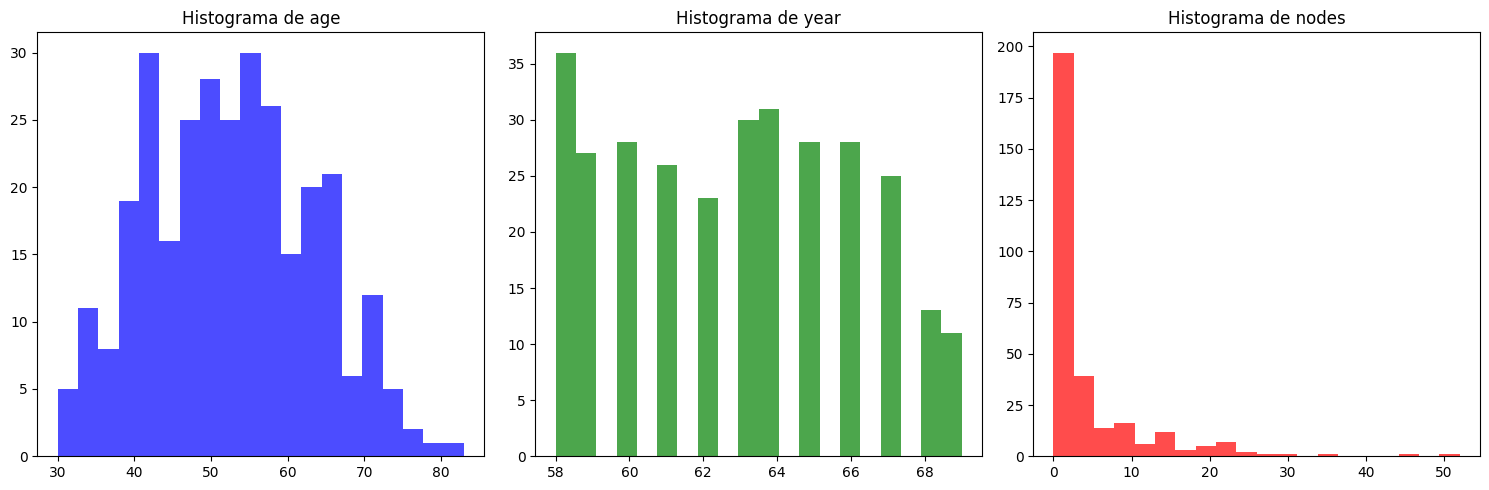

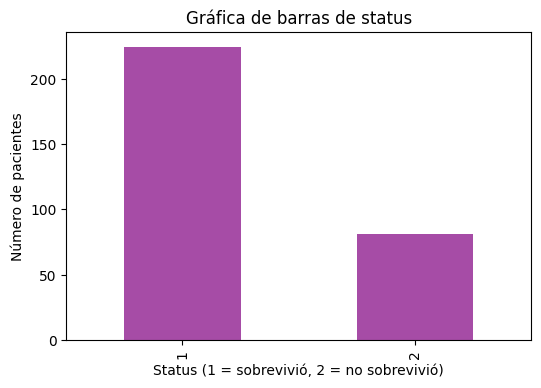

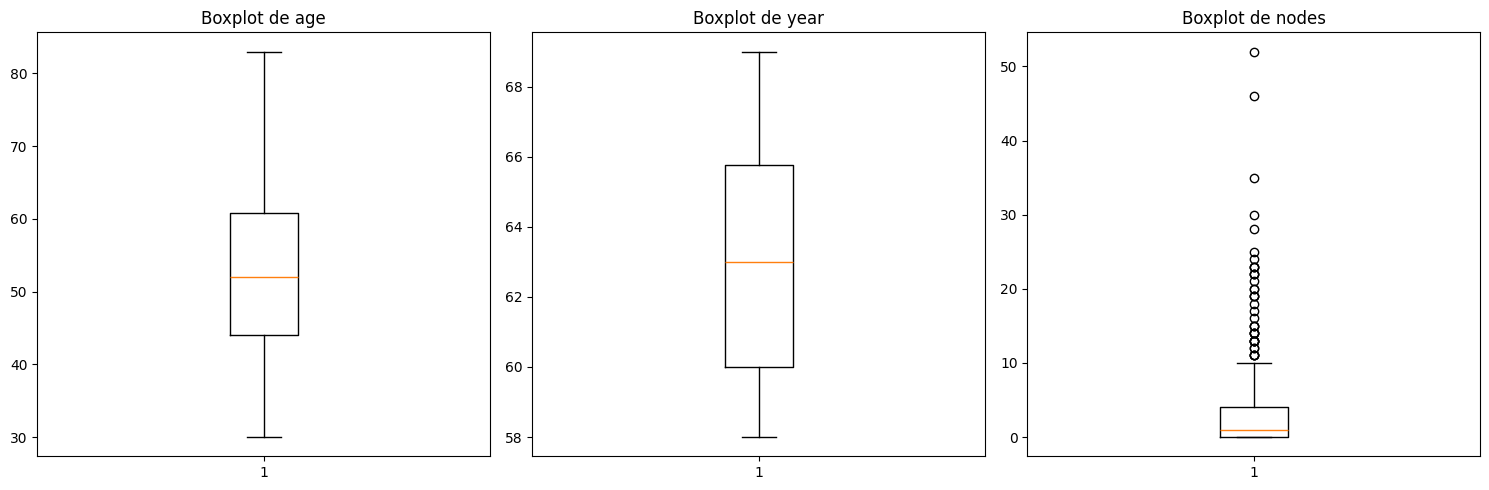

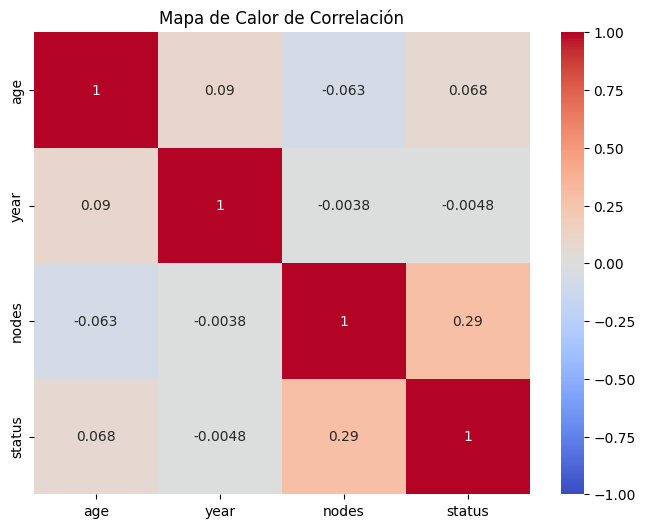

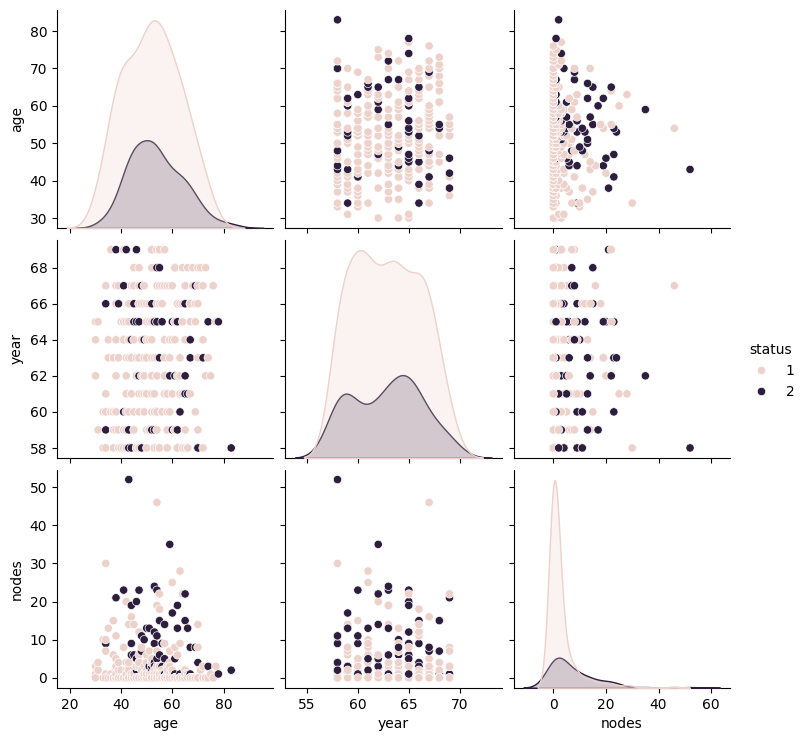


Pruebas de normalidad:

Variable: age
Shapiro-Wilk: stat=0.9895, p-valor=0.0260
Kolmogorov-Smirnov: stat=0.0479, p-valor=0.4698
Anderson-Darling: stat=0.7316, critical=0.7770 (5% significance)

Variable: year
Shapiro-Wilk: stat=0.9468, p-valor=0.0000
Kolmogorov-Smirnov: stat=0.1074, p-valor=0.0016
Anderson-Darling: stat=4.3137, critical=0.7770 (5% significance)

Variable: nodes
Shapiro-Wilk: stat=0.6153, p-valor=0.0000
Kolmogorov-Smirnov: stat=0.2877, p-valor=0.0000
Anderson-Darling: stat=39.6866, critical=0.7770 (5% significance)


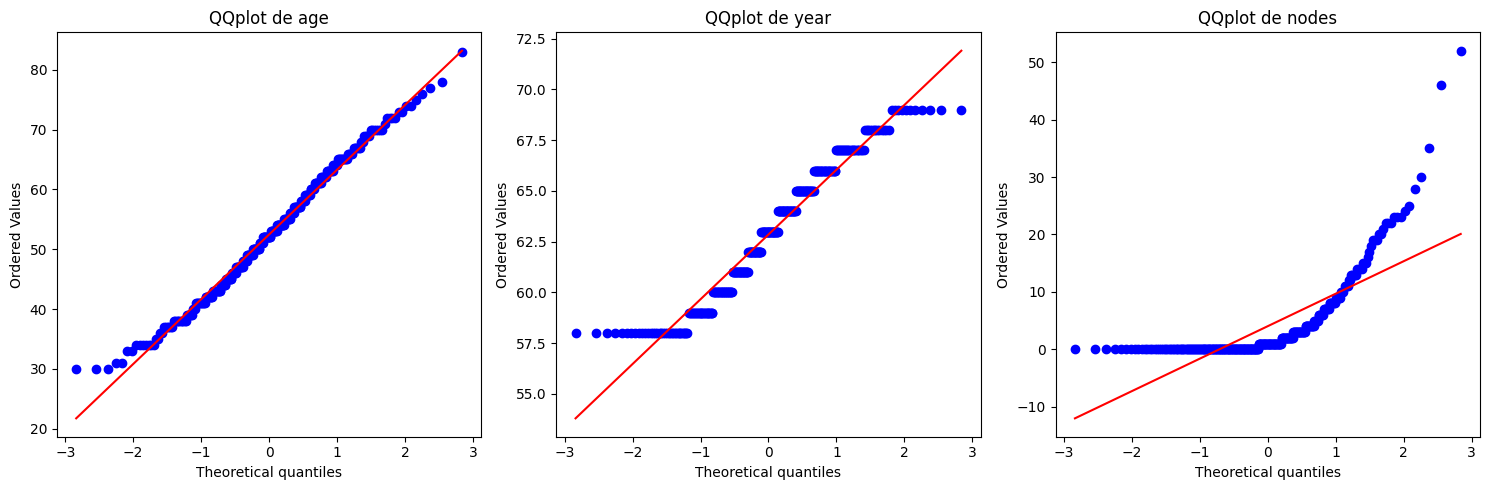


Valores faltantes antes de imputar:
age       0
year      0
nodes     0
status    0
dtype: int64

Valores faltantes después de simular:
age       35
year      39
nodes     25
status     0
dtype: int64

Valores faltantes después de imputar:
age       0
year      0
nodes     0
status    0
dtype: int64


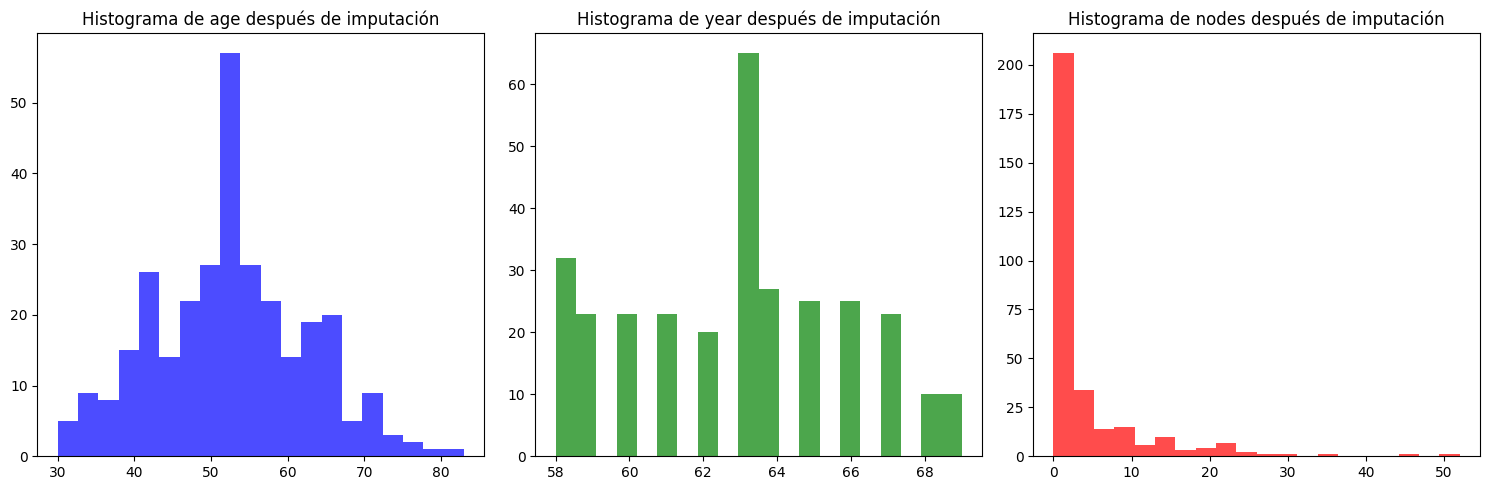

In [23]:
# Importo las librerías que voy a usar, las básicas para un EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Cargo el dataset desde la URL que me dieron
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names)

# Checo cómo se ven los datos
print("Primeras filas del dataset:")
print(data.head())
print("\nDescripción básica:")
print(data.describe())

# 1. Histogramas para las columnas numéricas (age, year, nodes)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(data['age'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma de age')
plt.subplot(1, 3, 2)
plt.hist(data['year'], bins=20, color='green', alpha=0.7)
plt.title('Histograma de year')
plt.subplot(1, 3, 3)
plt.hist(data['nodes'], bins=20, color='red', alpha=0.7)
plt.title('Histograma de nodes')
plt.tight_layout()
plt.show()

# 2. Gráfica de barras para la columna categórica status
plt.figure(figsize=(6, 4))
data['status'].value_counts().plot(kind='bar', color='purple', alpha=0.7)
plt.title('Gráfica de barras de status')
plt.xlabel('Status (1 = sobrevivió, 2 = no sobrevivió)')
plt.ylabel('Número de pacientes')
plt.show()

# 3. Boxplots para identificar outliers en las columnas numéricas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.boxplot(data['age'])
plt.title('Boxplot de age')
plt.subplot(1, 3, 2)
plt.boxplot(data['year'])
plt.title('Boxplot de year')
plt.subplot(1, 3, 3)
plt.boxplot(data['nodes'])
plt.title('Boxplot de nodes')
plt.tight_layout()
plt.show()

# 4. Matriz de correlación y mapa de calor
plt.figure(figsize=(8, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor de Correlación')
plt.show()

# 5. Pairplot para ver relaciones entre variables numéricas
sns.pairplot(data, hue='status')
plt.show()

# 6. Pruebas de normalidad (Shapiro-Wilk, Anderson-Darling, Kolmogorov-Smirnov)
print("\nPruebas de normalidad:")
for col in ['age', 'year', 'nodes']:
    print(f"\nVariable: {col}")
    # Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(data[col])
    print(f"Shapiro-Wilk: stat={shapiro_stat:.4f}, p-valor={shapiro_p:.4f}")
    # Kolmogorov-Smirnov
    ks_stat, ks_p = stats.kstest(data[col], 'norm', args=(data[col].mean(), data[col].std()))
    print(f"Kolmogorov-Smirnov: stat={ks_stat:.4f}, p-valor={ks_p:.4f}")
    # Anderson-Darling
    ad_result = stats.anderson(data[col], dist='norm')
    print(f"Anderson-Darling: stat={ad_result.statistic:.4f}, critical={ad_result.critical_values[2]:.4f} (5% significance)")

# 7. QQplots para las columnas numéricas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
stats.probplot(data['age'], dist="norm", plot=plt)
plt.title('QQplot de age')
plt.subplot(1, 3, 2)
stats.probplot(data['year'], dist="norm", plot=plt)
plt.title('QQplot de year')
plt.subplot(1, 3, 3)
stats.probplot(data['nodes'], dist="norm", plot=plt)
plt.title('QQplot de nodes')
plt.tight_layout()
plt.show()

# 8. Identifico datos faltantes
print("\nValores faltantes antes de imputar:")
print(data.isnull().sum())

# La descripción dice que hay faltantes, pero este dataset no tiene (según la metadata)
# Voy a simular algunos faltantes para cumplir con el requisito
data_with_missing = data.copy()
np.random.seed(42)  # Para que sea reproducible
for col in ['age', 'year', 'nodes']:
    mask = np.random.choice([True, False], size=data.shape[0], p=[0.1, 0.9])  # 10% de faltantes
    data_with_missing.loc[mask, col] = np.nan

print("\nValores faltantes después de simular:")
print(data_with_missing.isnull().sum())

# Imputo con la mediana porque hay outliers (como vi en los boxplots)
data_imputed = data_with_missing.copy()
for col in ['age', 'year', 'nodes']:
    data_imputed[col] = data_imputed[col].fillna(data_imputed[col].median())

print("\nValores faltantes después de imputar:")
print(data_imputed.isnull().sum())

# 9. Repito histogramas después de la imputación
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(data_imputed['age'], bins=20, color='blue', alpha=0.7)
plt.title('Histograma de age después de imputación')
plt.subplot(1, 3, 2)
plt.hist(data_imputed['year'], bins=20, color='green', alpha=0.7)
plt.title('Histograma de year después de imputación')
plt.subplot(1, 3, 3)
plt.hist(data_imputed['nodes'], bins=20, color='red', alpha=0.7)
plt.title('Histograma de nodes después de imputación')
plt.tight_layout()
plt.show()